In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls

drive  sample_data  submission1.csv  submission2.csv


In [ ]:
testdata=pd.read_csv("drive/MyDrive/Colab Notebooks/test_lAUu6dG.csv")

In [ ]:
data=pd.read_csv("drive/MyDrive/Colab Notebooks/train_ctrUa4K.csv")

In [ ]:
data.shape

(614, 13)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
data.isnull().values.any()                  

True

In [ ]:
data.isnull().values.sum()                  

149

In [ ]:
data.isnull().any()    

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
testdata.isnull().any()    

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [ ]:
data=pd.DataFrame(data)
print(data)

      Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]


In [ ]:
testdata=pd.DataFrame(testdata)
print(testdata)

      Loan_ID Gender Married  ... Loan_Amount_Term Credit_History Property_Area
0    LP001015   Male     Yes  ...            360.0            1.0         Urban
1    LP001022   Male     Yes  ...            360.0            1.0         Urban
2    LP001031   Male     Yes  ...            360.0            1.0         Urban
3    LP001035   Male     Yes  ...            360.0            NaN         Urban
4    LP001051   Male      No  ...            360.0            1.0         Urban
..        ...    ...     ...  ...              ...            ...           ...
362  LP002971   Male     Yes  ...            360.0            1.0         Urban
363  LP002975   Male     Yes  ...            360.0            1.0         Urban
364  LP002980   Male      No  ...            360.0            NaN     Semiurban
365  LP002986   Male     Yes  ...            360.0            1.0         Rural
366  LP002989   Male      No  ...            180.0            1.0         Rural

[367 rows x 12 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# DEALING WITH NULL VALUES# 

---



In [ ]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True )


In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [ ]:
 data['Married'].fillna(data['Married'].mode(), inplace=True )

In [ ]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

In [ ]:
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)

In [ ]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [ ]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True )

In [ ]:
data.isnull().any().sum()

1

TEST DATA MISSING VALUES

In [ ]:
testdata['Credit_History'].fillna(testdata['Credit_History'].mean(), inplace=True)

In [ ]:
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mean(), inplace=True)

In [ ]:
testdata['LoanAmount'].fillna(testdata['LoanAmount'].median(), inplace=True )

In [ ]:
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)

In [ ]:
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)

In [ ]:
 testdata['Married'].fillna(testdata['Married'].mode()[0], inplace=True )

In [ ]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True )

In [ ]:
testdata.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [ ]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
570,LP002842,Male,Yes,1,Graduate,No,3417,1750.0,186.0,360.0,1.0,Urban,Y
389,LP002250,Male,Yes,0,Graduate,No,5488,0.0,125.0,360.0,1.0,Rural,Y
241,LP001800,Male,Yes,1,Not Graduate,No,2510,1983.0,140.0,180.0,1.0,Urban,N
322,LP002054,Male,Yes,2,Not Graduate,No,3601,1590.0,128.0,360.0,1.0,Rural,Y
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y


In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']


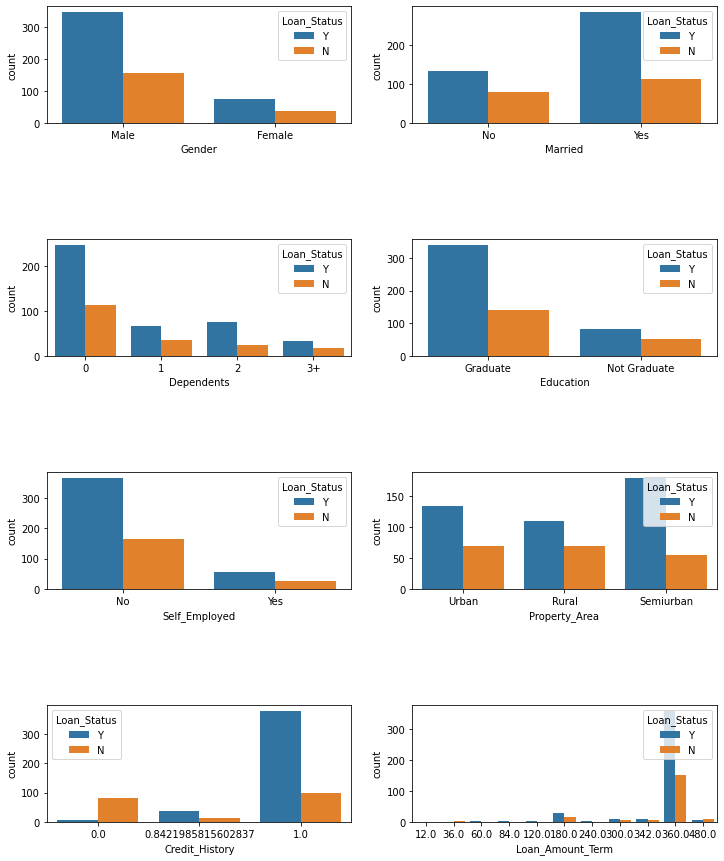

In [ ]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

# ENCODING THE DATA

In [ ]:
data_t=testdata.drop('Loan_ID', axis=1)

In [ ]:
data.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
data_t= pd.get_dummies(data_t, drop_first=True)

In [ ]:
data_t.sample(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
191,4083,0,96.0,360.000000,1.0,1,0,0,0,0,0,0,0,1
241,3887,1517,105.0,360.000000,0.0,1,1,0,0,0,0,0,1,0
97,3500,3250,140.0,360.000000,1.0,1,1,0,0,0,0,0,1,0
184,10166,750,150.0,342.537396,1.0,1,1,0,0,1,0,0,0,1
339,4333,2333,162.0,360.000000,0.0,0,0,0,0,0,0,0,0,0
172,5225,0,143.0,360.000000,1.0,1,1,0,0,0,0,0,0,0
315,7859,879,165.0,180.000000,1.0,0,1,0,0,0,0,0,1,0
53,4116,1000,30.0,180.000000,1.0,1,1,0,1,0,0,0,0,1
82,4136,0,149.0,480.000000,0.0,1,1,0,1,0,1,0,0,0
187,9167,0,235.0,360.000000,1.0,1,1,0,1,0,0,0,1,0


In [ ]:
data= pd.get_dummies(data, drop_first=True)

In [ ]:
data.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
457,3708,2569.0,173.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0
15,4950,0.0,125.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
159,4583,5625.0,255.0,360.0,1.0,1,1,0,0,0,0,0,1,0,1
523,7948,7166.0,480.0,360.0,1.0,1,1,0,1,0,0,1,0,0,1
336,5250,688.0,160.0,360.0,1.0,1,1,1,0,0,0,0,0,0,1


# check for outliers

In [ ]:
z = np.abs(stats.zscore(data)) #using it to fid the z score
print(z)


[[0.07299082 0.55448733 0.21124125 ... 0.7820157  1.42814704 0.67451931]
 [0.13441195 0.03873155 0.21124125 ... 0.7820157  0.70020801 1.48253724]
 [0.39374734 0.55448733 0.94899647 ... 0.7820157  1.42814704 0.67451931]
 ...
 [0.43717437 0.47240418 1.27616847 ... 0.7820157  1.42814704 0.67451931]
 [0.35706382 0.55448733 0.49081614 ... 0.7820157  1.42814704 0.67451931]
 [0.13441195 0.55448733 0.15174486 ... 1.2787467  0.70020801 1.48253724]]


In [ ]:
zt = np.abs(stats.zscore(data_t)) #using it to fid the z score
print(zt)


[[0.1864605  0.67333511 0.42677996 ... 0.33484506 0.67981718 1.27335328]
 [0.35269225 0.02984821 0.16395333 ... 0.33484506 0.67981718 1.27335328]
 [0.0396413  0.09884917 1.18303317 ... 0.33484506 0.67981718 1.27335328]
 ...
 [0.31721094 0.18164449 0.16395333 ... 0.33484506 1.47098372 0.78532801]
 [0.0396413  0.353241   0.36169994 ... 0.33484506 0.67981718 0.78532801]
 [0.89608667 0.67333511 0.62389994 ... 2.98645591 0.67981718 0.78532801]]


In [ ]:
threshold = 3
print(np.where(z > 3)) 

(array([  7,   9,  14,  34,  61,  68,  68,  73,  74,  78,  79,  94, 109,
       126, 126, 130, 133, 135, 155, 155, 155, 171, 171, 171, 172, 177,
       177, 177, 183, 185, 202, 211, 213, 215, 242, 255, 257, 259, 262,
       267, 278, 295, 308, 313, 321, 324, 333, 333, 338, 340, 343, 352,
       359, 369, 376, 390, 391, 402, 409, 409, 417, 432, 442, 443, 461,
       466, 472, 481, 487, 495, 497, 506, 515, 522, 523, 525, 531, 539,
       546, 557, 561, 567, 574, 575, 581, 585, 592, 600, 600, 602, 604,
       610]), array([9, 1, 3, 9, 9, 3, 9, 9, 9, 9, 9, 3, 9, 0, 9, 2, 3, 9, 0, 2, 9, 0,
       2, 9, 9, 1, 2, 9, 0, 0, 9, 9, 9, 9, 3, 9, 9, 9, 3, 9, 2, 9, 2, 3,
       9, 9, 0, 2, 9, 9, 9, 9, 9, 2, 9, 9, 9, 1, 0, 9, 1, 2, 9, 0, 9, 9,
       9, 9, 2, 3, 3, 2, 9, 9, 2, 2, 9, 9, 3, 9, 2, 9, 9, 3, 1, 3, 9, 1,
       9, 9, 2, 9]))


In [ ]:
#threshold = 3
#print(np.where(zt > 3)) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


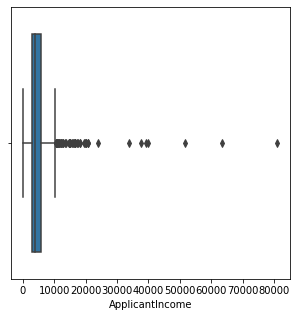

In [ ]:
sns.boxplot(data["ApplicantIncome"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


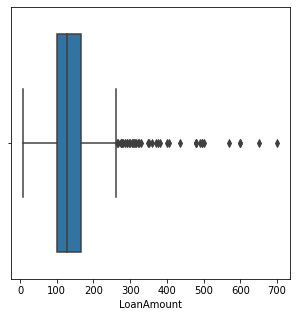

In [ ]:
sns.boxplot(data["LoanAmount"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


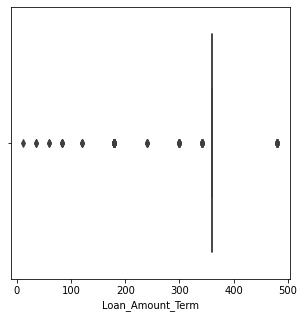

In [ ]:
sns.boxplot(data["Loan_Amount_Term"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


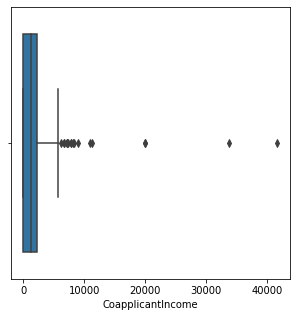

In [ ]:
sns.boxplot(data["CoapplicantIncome"])

In [ ]:
data = data[(z < 3).all(axis=1)]
data.shape

(533, 15)

# HEAT MAP

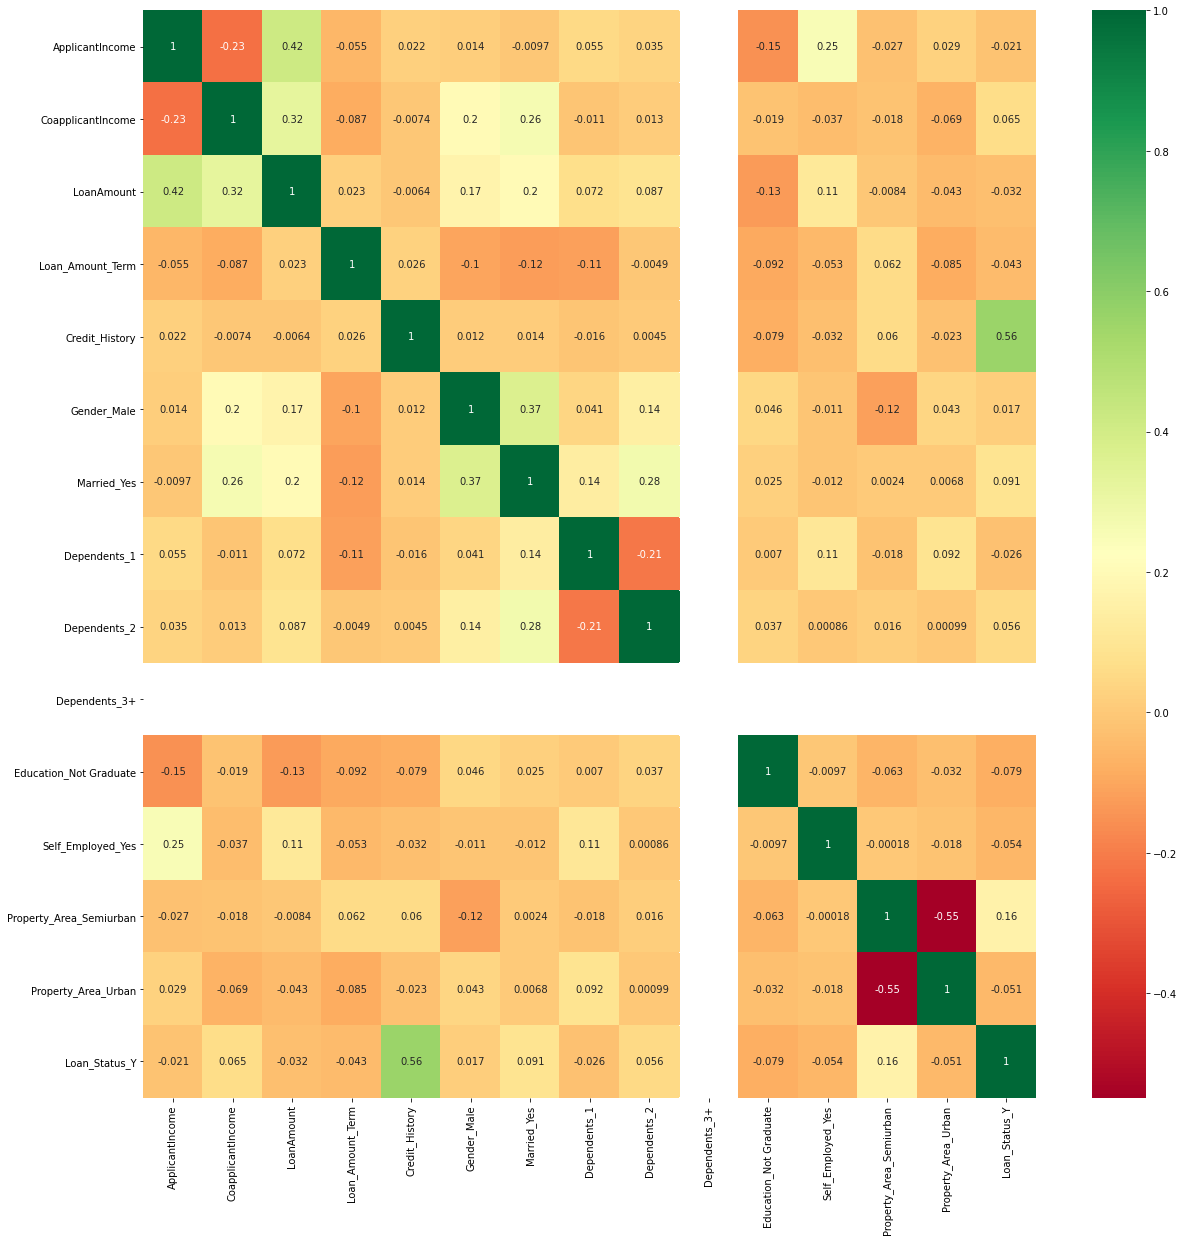

In [ ]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
y=data['Loan_Status_Y']   #making y target
data =data.drop('Loan_Status_Y', axis = 1)  #removing y from table
x=data
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3232,1950.0,108.0,360.0,1.0,1,1,0,0,0,0,0,0,0
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [ ]:
y.shape


(533,)

In [ ]:
x.shape


(533, 14)

# **FEATURE SCALING**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


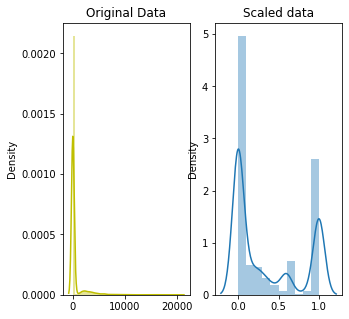

In [ ]:
scaled_data = minmax_scale(data)
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(data, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [ ]:
x=scaled_data

In [ ]:
x

array([[0.27776965, 0.        , 0.32075472, ..., 0.        , 0.        ,
        1.        ],
       [0.21606473, 0.16792873, 0.32075472, ..., 0.        , 0.        ,
        0.        ],
       [0.1389092 , 0.        , 0.15363881, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.38611883, 0.02672606, 0.65768194, ..., 0.        , 0.        ,
        1.        ],
       [0.36228493, 0.        , 0.47978437, ..., 0.        , 0.        ,
        1.        ],
       [0.21606473, 0.        , 0.33423181, ..., 1.        , 1.        ,
        0.        ]])

# **MODELLING**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (373, 14) (373,)
Test set: (160, 14) (160,)


In [ ]:
Loan_ID=testdata['Loan_ID']
#for submission file format

## **XGBOOST**

In [ ]:
xgb = XGBClassifier(n_estimators=300,learning_rate=0.05, random_state=1, max_depth=4, gamma=1, colsample_bytree=0.3,subsample=0.8,reg_lambda=2)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
preds = xgb.predict(x_test)
xgb_ac=xgb.score(x_test, y_test)
print("Training Accuracy :", xgb.score(x_train, y_train))
print("Testing Accuracy :", xgb_ac)


print("Mean Absolute Error : " + str(mean_absolute_error(preds,y_test)))


Training Accuracy : 0.8525469168900804
Testing Accuracy : 0.80625
Mean Absolute Error : 47.81875


              precision    recall  f1-score   support

           0       0.95      0.39      0.55        49
           1       0.79      0.99      0.88       111

    accuracy                           0.81       160
   macro avg       0.87      0.69      0.71       160
weighted avg       0.84      0.81      0.78       160



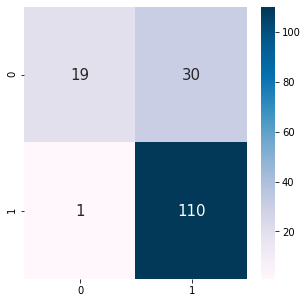

In [ ]:
# cofusion matrix
cm = confusion_matrix(y_test, preds)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='g')

# classification report
cr = classification_report(y_test, preds)
print(cr)


In [ ]:
pred_actual =pd.DataFrame({'predicted':preds, 'actual': y_test})
pred_actual

,predicted,actual
6,1,1
559,1,1
116,1,1
556,1,1
510,1,0
...,...,...
125,1,1
194,1,1
270,1,1
451,1,1


In [ ]:
test_predictions = xgb.predict(data_t.values)#.....test test file

In [ ]:
submission1 = pd.DataFrame({"Loan_ID": Loan_ID, "Loan_Status": test_predictions})#make submission file

In [ ]:
submission1["Loan_Status"].replace((1, 0), ("Y", "N"), inplace=True)

In [ ]:
submission1.to_csv('submission1.csv', index=False) 

In [ ]:
import csv
with open('/content/submission1.csv') as f:
   reader = csv.reader(f)
   your_list = list(reader)

print (your_list)

[['Loan_ID', 'Loan_Status'], ['LP001015', 'N'], ['LP001022', 'Y'], ['LP001031', 'Y'], ['LP001035', 'Y'], ['LP001051', 'N'], ['LP001054', 'Y'], ['LP001055', 'N'], ['LP001056', 'N'], ['LP001059', 'Y'], ['LP001067', 'Y'], ['LP001078', 'N'], ['LP001082', 'Y'], ['LP001083', 'N'], ['LP001094', 'N'], ['LP001096', 'N'], ['LP001099', 'N'], ['LP001105', 'Y'], ['LP001107', 'Y'], ['LP001108', 'Y'], ['LP001115', 'Y'], ['LP001121', 'Y'], ['LP001124', 'N'], ['LP001128', 'N'], ['LP001135', 'N'], ['LP001149', 'Y'], ['LP001153', 'N'], ['LP001163', 'Y'], ['LP001169', 'Y'], ['LP001174', 'Y'], ['LP001176', 'N'], ['LP001177', 'N'], ['LP001183', 'Y'], ['LP001185', 'Y'], ['LP001187', 'Y'], ['LP001190', 'Y'], ['LP001203', 'N'], ['LP001208', 'Y'], ['LP001210', 'Y'], ['LP001211', 'N'], ['LP001219', 'N'], ['LP001220', 'Y'], ['LP001221', 'N'], ['LP001226', 'Y'], ['LP001230', 'Y'], ['LP001231', 'N'], ['LP001232', 'N'], ['LP001237', 'Y'], ['LP001242', 'Y'], ['LP001268', 'N'], ['LP001270', 'Y'], ['LP001284', 'Y'], ['

### **2.RANDOM FOREST CLASSIFIER**

Training Accuracy : 0.8364611260053619
Testing Accuracy : 0.74375
              precision    recall  f1-score   support

           0       0.62      0.43      0.51        49
           1       0.78      0.88      0.83       111

    accuracy                           0.74       160
   macro avg       0.70      0.66      0.67       160
weighted avg       0.73      0.74      0.73       160



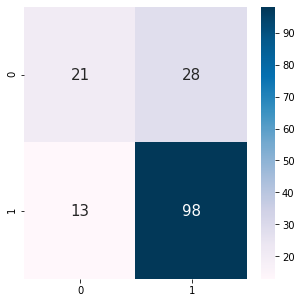

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth =4, random_state=42, min_samples_split = 5, oob_score = True, n_jobs = -1, max_features = "auto",criterion = 'entropy', max_leaf_nodes = 30,class_weight='balanced_subsample',min_samples_leaf = 10)
rfc.fit(x_train, y_train)
y_pred_quant = rfc.predict_proba(x_test)[:, 1]
y_preds = rfc.predict(x_test)
rfc_ac=rfc.score(x_test, y_test)
# evaluating the model
print("Training Accuracy :", rfc.score(x_train, y_train))
print("Testing Accuracy :", rfc_ac)



# cofusion matrix
cm = confusion_matrix(y_test, y_preds)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='g')

# classification report
cr = classification_report(y_test, y_preds)
print(cr)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rfc, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.754


In [ ]:
pred_actual =pd.DataFrame({'predicted':y_preds, 'actual': y_test})
pred_actual

,predicted,actual
6,1,1
559,1,1
116,1,1
556,0,1
510,1,0
...,...,...
125,1,1
194,1,1
270,0,1
451,1,1


In [ ]:
predictions = rfc.predict(data_t.values)#.....test test file

In [ ]:
submission2 = pd.DataFrame({"Loan_ID": Loan_ID, "Loan_Status": predictions})#make submission file

In [ ]:
submission2["Loan_Status"].replace((1, 0), ("Y", "N"), inplace=True)

In [ ]:
submission2.to_csv('submission2.csv',index=False) 

In [ ]:
import csv
with open('/content/submission2.csv') as f:
   reader = csv.reader(f)
   submissionlist = list(reader)

print (submissionlist)

[['Loan_ID', 'Loan_Status'], ['LP001015', 'N'], ['LP001022', 'Y'], ['LP001031', 'Y'], ['LP001035', 'Y'], ['LP001051', 'N'], ['LP001054', 'Y'], ['LP001055', 'Y'], ['LP001056', 'N'], ['LP001059', 'Y'], ['LP001067', 'Y'], ['LP001078', 'N'], ['LP001082', 'Y'], ['LP001083', 'N'], ['LP001094', 'N'], ['LP001096', 'N'], ['LP001099', 'N'], ['LP001105', 'Y'], ['LP001107', 'Y'], ['LP001108', 'Y'], ['LP001115', 'Y'], ['LP001121', 'Y'], ['LP001124', 'N'], ['LP001128', 'N'], ['LP001135', 'N'], ['LP001149', 'Y'], ['LP001153', 'N'], ['LP001163', 'Y'], ['LP001169', 'Y'], ['LP001174', 'Y'], ['LP001176', 'N'], ['LP001177', 'Y'], ['LP001183', 'Y'], ['LP001185', 'Y'], ['LP001187', 'Y'], ['LP001190', 'Y'], ['LP001203', 'N'], ['LP001208', 'Y'], ['LP001210', 'Y'], ['LP001211', 'N'], ['LP001219', 'N'], ['LP001220', 'Y'], ['LP001221', 'N'], ['LP001226', 'Y'], ['LP001230', 'Y'], ['LP001231', 'N'], ['LP001232', 'Y'], ['LP001237', 'Y'], ['LP001242', 'Y'], ['LP001268', 'N'], ['LP001270', 'Y'], ['LP001284', 'Y'], ['

### **ADABOOST**

In [ ]:

from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, min_samples_split=8, min_samples_leaf=10),n_estimators=500, random_state=3, learning_rate=0.001)
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=8,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

In [ ]:
search.fit(x,y)
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=cv)

In [ ]:

from numpy import mean
from numpy import std
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ada, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.040)


In [ ]:
adapred = ada.predict(x_test)
ada_ac=ada.score(x_test,y_test)

# evaluating the model
print (f'Train Accuracy - : {ada.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {ada.score(x_test,y_test):.3f}')

Train Accuracy - : 0.853
Test Accuracy - : 0.794


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,adapred))

              precision    recall  f1-score   support

           0       0.94      0.35      0.51        49
           1       0.77      0.99      0.87       111

    accuracy                           0.79       160
   macro avg       0.86      0.67      0.69       160
weighted avg       0.83      0.79      0.76       160



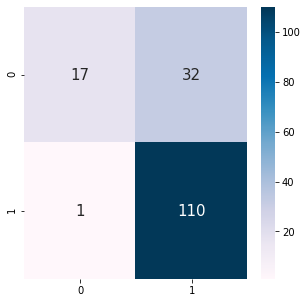

In [ ]:
# cofusion matrix
cm = confusion_matrix(y_test, adapred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='g')

In [ ]:
pred_actual =pd.DataFrame({'predicted':preds, 'actual': y_test})
pred_actual

,predicted,actual
6,1,1
559,1,1
116,1,1
556,1,1
510,1,0
...,...,...
125,1,1
194,1,1
270,1,1
451,1,1


In [ ]:
predict = ada.predict(data_t.values)

In [ ]:
submission3 = pd.DataFrame({"Loan_ID": Loan_ID, "Loan_Status": predict})#make submission file

In [ ]:
submission3["Loan_Status"].replace((1, 0), ("Y", "N"), inplace=True)

In [ ]:
submission3.to_csv('submission3.csv',index=False) 

In [ ]:
import csv
with open('/content/submission3.csv') as f:
   reader = csv.reader(f)
   submissionada = list(reader)

print (submissionada)

[['Loan_ID', 'Loan_Status'], ['LP001015', 'N'], ['LP001022', 'Y'], ['LP001031', 'Y'], ['LP001035', 'Y'], ['LP001051', 'N'], ['LP001054', 'Y'], ['LP001055', 'N'], ['LP001056', 'N'], ['LP001059', 'N'], ['LP001067', 'N'], ['LP001078', 'N'], ['LP001082', 'Y'], ['LP001083', 'N'], ['LP001094', 'N'], ['LP001096', 'N'], ['LP001099', 'N'], ['LP001105', 'Y'], ['LP001107', 'Y'], ['LP001108', 'Y'], ['LP001115', 'N'], ['LP001121', 'Y'], ['LP001124', 'N'], ['LP001128', 'N'], ['LP001135', 'N'], ['LP001149', 'Y'], ['LP001153', 'N'], ['LP001163', 'Y'], ['LP001169', 'Y'], ['LP001174', 'Y'], ['LP001176', 'N'], ['LP001177', 'N'], ['LP001183', 'Y'], ['LP001185', 'N'], ['LP001187', 'Y'], ['LP001190', 'Y'], ['LP001203', 'N'], ['LP001208', 'Y'], ['LP001210', 'Y'], ['LP001211', 'N'], ['LP001219', 'N'], ['LP001220', 'Y'], ['LP001221', 'N'], ['LP001226', 'Y'], ['LP001230', 'N'], ['LP001231', 'N'], ['LP001232', 'Y'], ['LP001237', 'Y'], ['LP001242', 'N'], ['LP001268', 'N'], ['LP001270', 'Y'], ['LP001284', 'Y'], ['

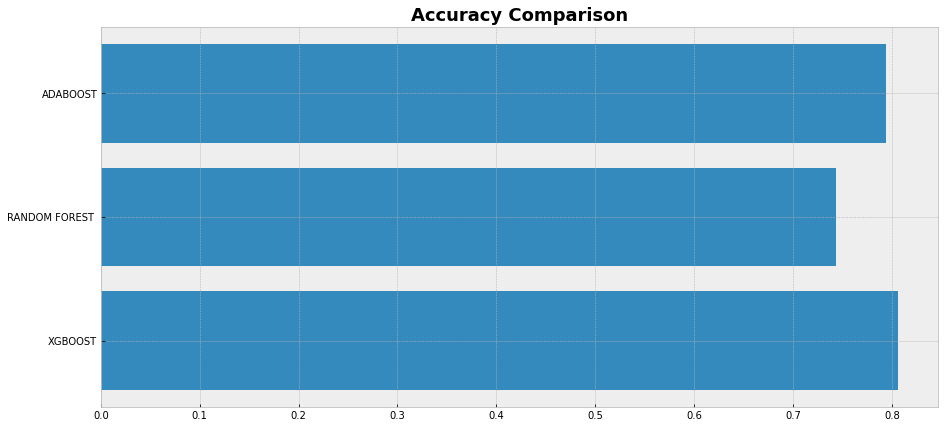

In [ ]:
names=[]
names.append('XGBOOST')
names.append('RANDOM FOREST ')
names.append('ADABOOST')
results=[]
results.append(xgb_ac)
results.append(rfc_ac)
results.append(ada_ac)

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('bmh') #style
plt.barh(names,results)
plt.title("Accuracy Comparison",  weight='bold', size=18)
sns.set_context('poster') #everything is larger..for smaller use paper, for presentation use talk
plt.Xlabel=results
plt.ylabel=names 
plt.show()

In [ ]:
pickle.dump(xgb,open ('xgbmodel.pkl','wb'))

In [ ]:
model=pickle.load(open ('xgbmodel.pkl','rb'))
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
result = model.score(x_test, y_test)
print(result)

0.80625
